# Titanic Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Collecting Data

In [2]:
titanic_data=pd.read_excel('D:/Python_project/Titanic Survival Prediction/titanic.xlsx')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

In [3]:
#Summary of Data File
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#Length of Data File
print("The Length of titanic data file is "+str(len(titanic_data)))

The Length of titanic data file is 891


In [5]:
#Shape of Data File
print("The Shape of data file is "+str(titanic_data.shape))

The Shape of data file is (891, 12)


In [6]:
#Columns present in Data File
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#Stastical description of data file
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [8]:
#checking if data contaning any null value
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

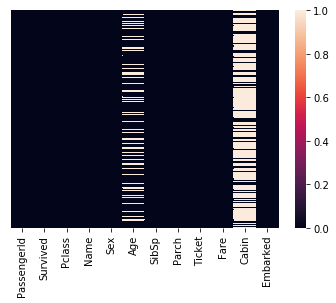

In [9]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [10]:
#drop cabin column cause it consist lot of null values and there is no use of this column
titanic_data.drop('Cabin',axis=1,inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
#drop all null values
titanic_data.dropna(inplace=True)

In [12]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

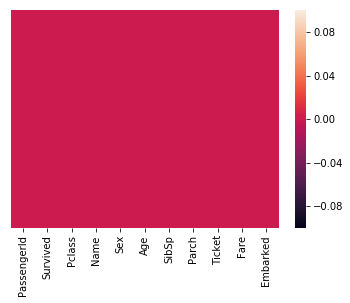

In [16]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

Here,we can see that the data file is clean. There are no Null or NAN values present in Data File

In [17]:
titanic_data['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

# Data Visualization

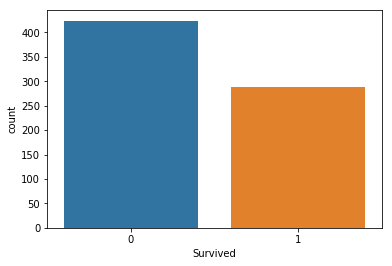

In [19]:
sns.countplot(x='Survived',data=titanic_data)

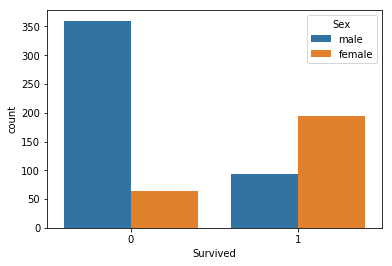

In [20]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

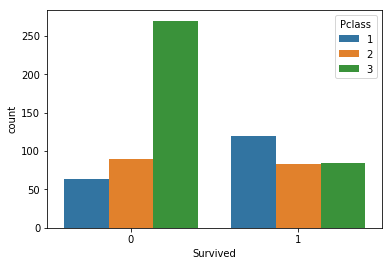

In [21]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

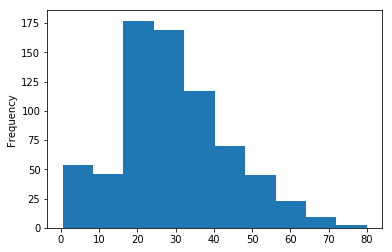

In [22]:
titanic_data['Age'].plot.hist()

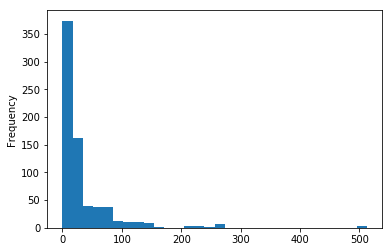

In [23]:
titanic_data['Fare'].plot.hist(bins=30)

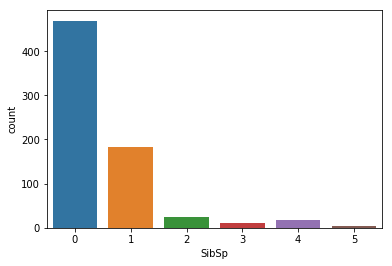

In [24]:
sns.countplot(x='SibSp',data=titanic_data)

# Data Wrangling

In [25]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [28]:
sex=pd.get_dummies(titanic_data['Sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [29]:
emb=pd.get_dummies(titanic_data['Embarked'])
emb.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [31]:
pcl=pd.get_dummies(titanic_data['Pclass'])
pcl.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [32]:
titanic_data=pd.concat([titanic_data,sex,emb,pcl],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1,0,0,1


In [33]:
titanic_data.drop(['Pclass','Name','Sex','Ticket','Embarked','PassengerId'],axis=1,inplace=True)
titanic_data.head(2)

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0


# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [37]:
print("Shape of X_train is "+str(X_train.shape))

Shape of X_train is (498, 12)


In [38]:
print("Shape of X_test is "+str(X_test.shape))

Shape of X_test is (214, 12)


In [39]:
print("Shape of y_train is "+str(y_train.shape))

Shape of y_train is (498,)


In [40]:
print("Shape of y_test is "+str(y_test.shape))

Shape of y_test is (214,)


# Model Evaluation

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_model=LogisticRegression()

In [43]:
log_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Prediction and Evaluation

In [44]:
prediction=log_model.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [46]:
print("Classification Report :\n")
print(classification_report(y_test,prediction))
print("\n")
print("Confusion matrix:\n")
print(confusion_matrix(y_test,prediction))
print("\n")
print("Accuracy score :\n")
print(accuracy_score(y_test,prediction)*100)

Classification Report :

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       126
           1       0.73      0.73      0.73        88

   micro avg       0.78      0.78      0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214



Confusion matrix:

[[102  24]
 [ 24  64]]


Accuracy score :

77.57009345794393
